# 1.) Preprocess your data into scaled input variables and an output variable


In [3]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np
import datetime

In [4]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [5]:
df = pd.read_csv("/content/gdrive/MyDrive/441B/CLV.csv")
df.drop('Unnamed: 0',axis=1)

,Customer Lifetime Value,Income,Number of Policies,Total Claim Amount,Months Since Last Claim,Vehicle Size_Large,Vehicle Size_Medsize,Gender_M,EmploymentStatus_Employed,EmploymentStatus_Medical Leave,EmploymentStatus_Retired,EmploymentStatus_Unemployed,Policy Type_Corporate Auto,Policy Type_Personal Auto,Marital Status_Divorced,Marital Status_Married,Marital Status_Single
0,2763.519279,56274,1,384.811147,32,0,1,0,1,0,0,0,1,0,0,1,0
1,6979.535903,0,8,1131.464935,13,0,1,0,0,0,0,1,0,1,0,0,1
2,12887.431650,48767,2,566.472247,18,0,1,0,1,0,0,0,0,1,0,1,0
3,7645.861827,0,7,529.881344,18,0,1,1,0,0,0,1,1,0,0,1,0
4,2813.692575,43836,1,138.130879,12,0,1,1,1,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,2,198.234764,18,0,1,1,1,0,0,0,0,1,0,1,0
9130,3096.511217,21604,1,379.200000,14,0,1,0,1,0,0,0,1,0,1,0,0
9131,8163.890428,0,2,790.784983,9,0,1,1,0,0,0,1,1,0,0,0,1
9132,7524.442436,21941,3,691.200000,34,1,0,1,1,0,0,0,0,1,0,1,0


In [6]:
X = df.iloc[:,2:]
y = df.iloc[:,1]

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3)

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
scaler=StandardScaler().fit(X_train)
x_train_scale=scaler.transform(X_train)
x_test_scale=scaler.transform(X_test)

# 2.) Run a GridSearch CV on at least 10 possible combinations of hyper parameters 

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPRegressor

In [ ]:
clf=MLPRegressor()
params={'hidden_layer_sizes':[(15,),(5,5,),(5,10,),(5,15,),(10,5,5,)],
    'activation':['relu','logistic']}

grid=GridSearchCV(clf,params,cv=10)


In [ ]:
grid.fit(x_train_scale,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:

GridSearchCV(cv=10, estimator=MLPRegressor(),
             param_grid={'activation': ['relu', 'logistic'],
                         'hidden_layer_sizes': [(15,), (5, 5), (5, 10), (5, 15),
                                                (10, 5, 5)]})

# 3.) Train a model with the optimal solution from GridSearch

In [ ]:
print(grid.best_params_,grid.best_score_)

{'activation': 'relu', 'hidden_layer_sizes': (10, 5, 5)} 0.08046599818164694


In [ ]:
regressor=MLPRegressor(**grid.best_params_)
regressor.fit(x_train_scale,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(hidden_layer_sizes=(10, 5, 5))

# 4.) What are the in-sample and out of sample MSEs

In [ ]:
y_pred_in=regressor.predict(x_train_scale)
y_pred=regressor.predict(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but MLPRegressor was fitted without feature names
  warnings.warn(


In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
in_mse=mean_squared_error(y_train,y_pred_in)
out_mse=mean_squared_error(y_test,y_pred)

print(in_mse,out_mse)

42255980.97664748 2598673232073875.0


# 5.) Build a Keras with the architecture defined by GridSearchCV

In [14]:
import keras.models
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import Adam

In [12]:
model=Sequential()
model.add(Dense(10,input_dim=x_train_scale.shape[1],activation='relu'))
model.add(Dense(5,activation='relu'))
model.add(Dense(5,activation='relu'))

model.compile(loss='mse',optimizer=Adam(lr=0.01))
model.fit(x_train_scale,y_train,batch_size=32,epochs=5)

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/5
200/200 [==============================] - 1s 2ms/step - loss: 98919688.0000
Epoch 2/5
200/200 [==============================] - 0s 2ms/step - loss: 50802208.0000
Epoch 3/5
200/200 [==============================] - 1s 3ms/step - loss: 45368488.0000
Epoch 4/5
200/200 [==============================] - 1s 4ms/step - loss: 44193708.0000
Epoch 5/5
200/200 [==============================] - 1s 3ms/step - loss: 43652496.0000


In [15]:
keras.models.save_model(model,'/folder')

# 6.) Make two visualizations of your NN using “plot_model” and “ann_viz”

In [20]:
from tensorflow.keras.utils import plot_model

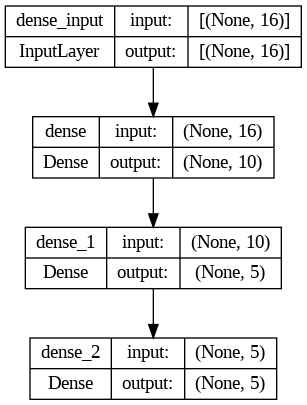

In [23]:
plot_model(model,show_shapes=True)

In [24]:
pip install ann-visualizer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for ann-visualizer: filename=ann_visualizer-2.5-py3-none-any.whl size=4168 sha256=c58e655c7d7869e396a8c9632672c2683e48dfe8ad4bec58ae8273f18bcafe17
  Stored in directory: /root/.cache/pip/wheels/4b/ef/77/9b8c4ae2f9a11de19957b80bc5c684accd99114bb8dc6b374c
Successfully built ann-visualizer


In [30]:
from ann_visualizer.visualize import ann_viz

In [34]:
ann_viz(model,title='keras viz',filename='/content/gdrive/MyDrive/441B/nn_model.gz')